# Práctica 1.1: Muestreo, Cuantización, Reconstrucción y Solapamiento

## Introducción

En esta práctica, vamos a estudiar los conceptos fundamentales de procesamiento de señales, como el muestreo, cuantización, reconstrucción de señales y el solapamiento. A través de ejemplos, visualizaciones y código Python, aprenderemos cómo cada proceso afecta la señal y qué errores pueden surgir cuando no se aplican correctamente.

---

## 1. Muestreo

El muestreo es el proceso de convertir una señal continua en el tiempo en una señal discreta, tomando muestras de la señal original en intervalos regulares.

### Ejemplo de Muestreo

Tomemos una señal sinusoidal $x(t) = \sin(2\pi f t)$, con una frecuencia de $f = 15 Hz$, y muestremos la señal con diferentes frecuencias de muestreo $F_s$.

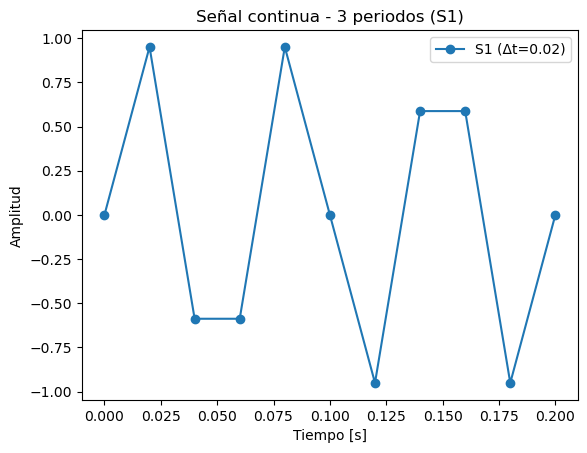

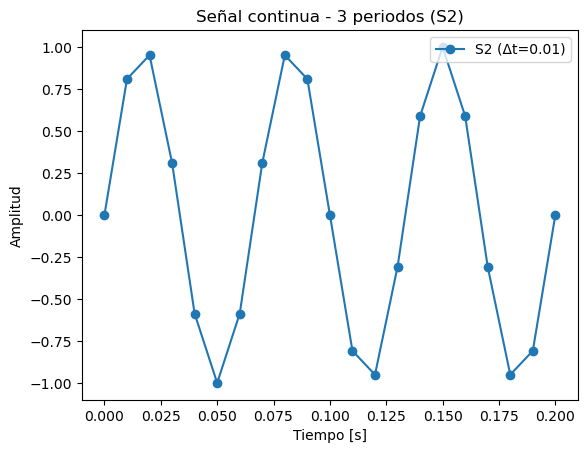

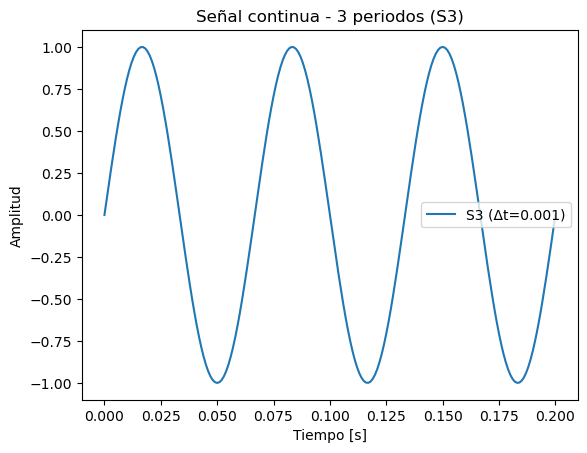

Número de muestras en S1 (Δt=0.02):   11
Número de muestras en S2 (Δt=0.01):  21
Número de muestras en S3 (Δt=0.001): 201


In [4]:
import numpy as np
import matplotlib.pyplot as plt

f = 15  # Frecuencia de la señal en Hz
T = 1 / f  # Periodo de la señal
num_periodos = 3

# Ejes temporales para 3 periodos con diferentes resoluciones
t_cont1 = np.arange(0, num_periodos * T + 1/50, 1/50)
t_cont2 = np.arange(0, num_periodos * T + 1/100, 1/100)
t_cont3 = np.arange(0, num_periodos * T + 1/1000, 1/1000)

# Señales
x_cont1 = np.sin(2 * np.pi * f * t_cont1)
x_cont2 = np.sin(2 * np.pi * f * t_cont2)
x_cont3 = np.sin(2 * np.pi * f * t_cont3)

# Gráficas
plt.figure()
plt.plot(t_cont1, x_cont1, 'o-', label='S1 (Δt=0.02)')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal continua - 3 periodos (S1)')

plt.figure()
plt.plot(t_cont2, x_cont2, 'o-', label='S2 (Δt=0.01)')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal continua - 3 periodos (S2)')

plt.figure()
plt.plot(t_cont3, x_cont3, label='S3 (Δt=0.001)')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal continua - 3 periodos (S3)')

plt.show()

# Mostrar número de muestras
print(f"Número de muestras en S1 (Δt=0.02):   {len(t_cont1)}")
print(f"Número de muestras en S2 (Δt=0.01):  {len(t_cont2)}")
print(f"Número de muestras en S3 (Δt=0.001): {len(t_cont3)}")



### Código:

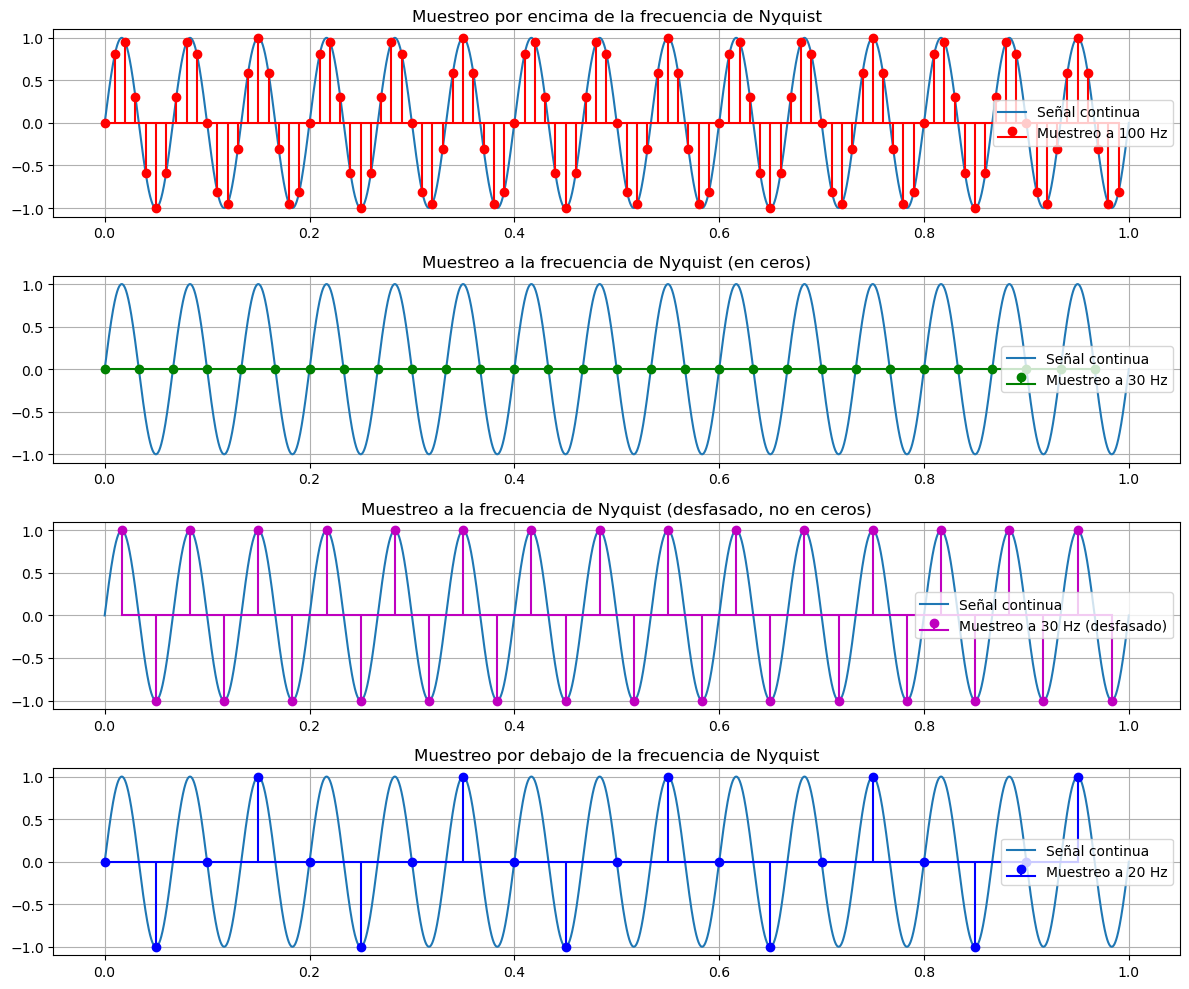

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
f = 15  # Frecuencia de la señal en Hz
Fs1 = 100  # Frecuencia de muestreo (por encima de Nyquist)
Fs2 = 30   # Frecuencia de muestreo (igual a Nyquist)
Fs2b = 30  # Mismo Fs, pero con desfase temporal
Fs3 = 20   # Frecuencia de muestreo (por debajo de Nyquist)

# Señal continua de referencia
t_cont = np.linspace(0, 1, 10000)
x_cont = np.sin(2 * np.pi * f * t_cont)

# Función de muestreo
def sample_signal(f, Fs, t_max=1, shift=0):
    """
    f: frecuencia de la señal
    Fs: frecuencia de muestreo
    t_max: duración total
    shift: desplazamiento temporal (en segundos)
    """
    t_samples = np.arange(shift, t_max, 1/Fs)
    x_samples = np.sin(2 * np.pi * f * t_samples)
    return t_samples, x_samples

# Muestreos
t_s1, x_s1 = sample_signal(f, Fs1)
t_s2, x_s2 = sample_signal(f, Fs2)
t_s2b, x_s2b = sample_signal(f, Fs2b, shift=1/(2*Fs2b))  # desplazado medio periodo de muestreo
t_s3, x_s3 = sample_signal(f, Fs3)

# Visualización
plt.figure(figsize=(12, 10))

# Caso 1: Por encima de Nyquist
plt.subplot(4, 1, 1)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s1, x_s1, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Muestreo a {Fs1} Hz')
plt.title('Muestreo por encima de la frecuencia de Nyquist')
plt.legend()
plt.grid(True)

# Caso 2: A la frecuencia de Nyquist (en ceros)
plt.subplot(4, 1, 2)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s2, x_s2, linefmt='g-', markerfmt='go', basefmt='g-', label=f'Muestreo a {Fs2} Hz')
plt.title('Muestreo a la frecuencia de Nyquist (en ceros)')
plt.legend()
plt.grid(True)

# Caso 2b: A la frecuencia de Nyquist, desplazado
plt.subplot(4, 1, 3)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s2b, x_s2b, linefmt='m-', markerfmt='mo', basefmt='m-', label=f'Muestreo a {Fs2b} Hz (desfasado)')
plt.title('Muestreo a la frecuencia de Nyquist (desfasado, no en ceros)')
plt.legend()
plt.grid(True)

# Caso 3: Por debajo de Nyquist
plt.subplot(4, 1, 4)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s3, x_s3, linefmt='b-', markerfmt='bo', basefmt='b-', label=f'Muestreo a {Fs3} Hz')
plt.title('Muestreo por debajo de la frecuencia de Nyquist')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



### Explicación:
- La primera señal muestra un muestreo a una frecuencia que está por encima de la frecuencia de Nyquist.
- La segunda muestra un muestreo exacto a la frecuencia de Nyquist.
- La tercera muestra un ejemplo de solapamiento cuando el muestreo es insuficiente.

---

## 2. Cuantización

La cuantización es el proceso de convertir una señal muestreada (que aún tiene valores continuos) en una señal con valores discretos en un conjunto finito de niveles.

### Implementación Manual del Cuantizador

A continuación implementaremos un cuantizador sin funciones predefinidas, para una señal muestreada.

### Código:

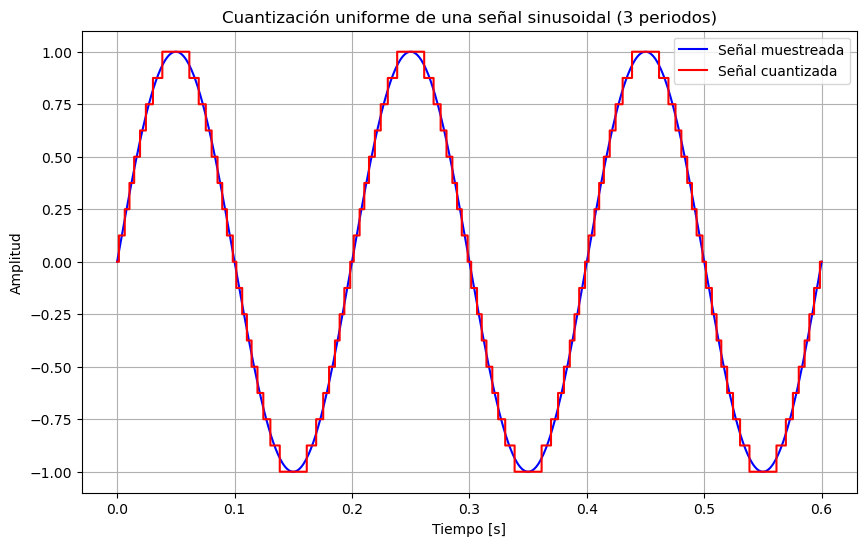

Error de cuantización (MSE): 0.001228


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
f = 5  # Frecuencia de la señal (Hz)
num_periodos = 3
T = 1 / f
t_max = num_periodos * T

Fs = 1000  # Frecuencia de muestreo (Hz)
t_s = np.arange(0, t_max, 1/Fs)
x_s = np.sin(2 * np.pi * f * t_s)  # Señal muestreada

# Parámetros del cuantizador
num_levels = 16  # Número de niveles de cuantización (menos niveles => más error visible)
xmin, xmax = -1, 1  # Rango de la señal
delta = (xmax - xmin) / num_levels  # Paso de cuantización

# Función de cuantización manual
def cuantizador(x, xmin, xmax, num_levels):
    delta = (xmax - xmin) / num_levels
    x_q = np.clip(x, xmin, xmax)  # Limitar valores al rango
    x_q = np.round((x_q - xmin) / delta) * delta + xmin  # Cuantización uniforme
    return x_q

# Cuantización de la señal muestreada
xq_s = cuantizador(x_s, xmin, xmax, num_levels)

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(t_s, x_s, 'b-', label='Señal muestreada')
plt.step(t_s, xq_s, 'r', where='mid', label='Señal cuantizada')
plt.title(f'Cuantización uniforme de una señal sinusoidal ({num_periodos} periodos)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo del error de cuantización (MSE)
error_cuantizacion = np.mean((x_s - xq_s)**2)
print(f"Error de cuantización (MSE): {error_cuantizacion:.6f}")


### Explicación:
El proceso de cuantización asigna cada muestra muestreada a un nivel de cuantización en un rango discreto, lo que introduce un error conocido como ruido de cuantización.

---

## 3. Reconstrucción

La reconstrucción es el proceso de convertir una señal cuantizada y muestreada de nuevo en una señal continua. El interpolador más común es el filtro paso bajo ideal, pero aquí usaremos una interpolación lineal simple para demostrar el concepto.

### Código:

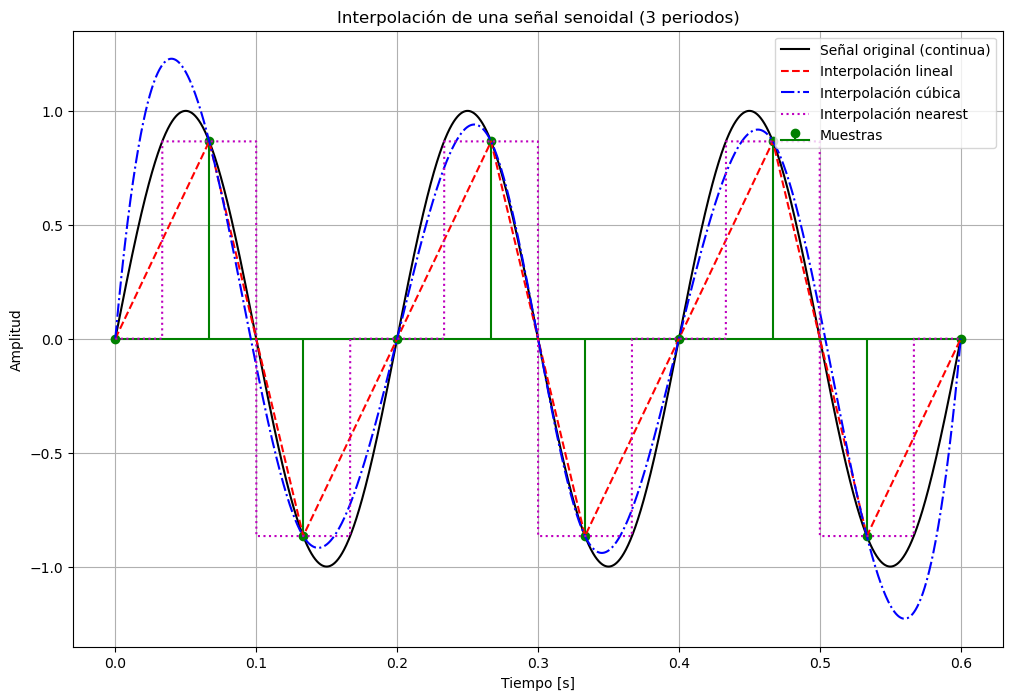

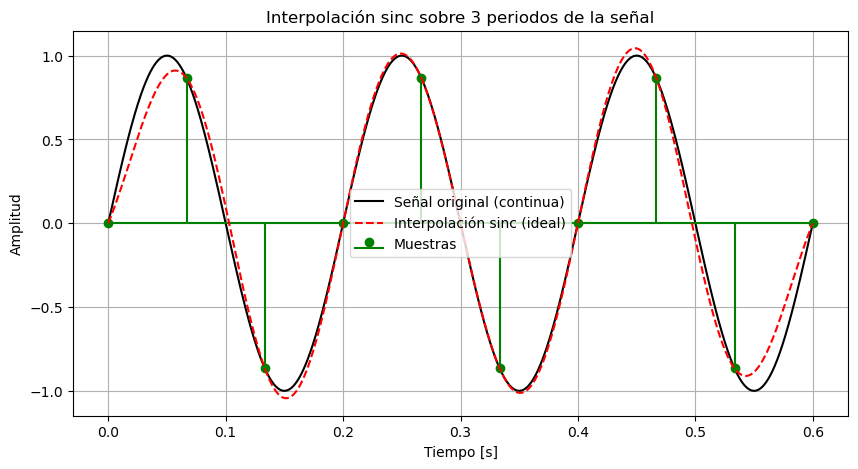

Error de reconstrucción lineal:  0.066069
Error de reconstrucción cúbica:  0.020044
Error de reconstrucción nearest: 0.173072
Error de reconstrucción sinc:    0.005747


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Parámetros de la señal
f = 5  # Frecuencia de la señal (Hz)
num_periodos = 3
T = 1 / f
t_max = num_periodos * T

# Muestreo
Fs = 15  # Frecuencia de muestreo (poco mayor que Nyquist para que se vea el efecto)
t_s = np.arange(0, t_max, 1/Fs)
x_s = np.sin(2 * np.pi * f * t_s)

# Señal continua original (alta resolución)
t_cont = np.linspace(0, t_max, 5000)
x_cont = np.sin(2 * np.pi * f * t_cont)

# Función sinc para la interpolación
def sinc_interpolacion(t, ts, xs):
    """
    Interpolación usando función sinc (interpolación ideal)
    """
    x_rec = np.zeros_like(t)
    Ts = ts[1] - ts[0]
    for i in range(len(xs)):
        x_rec += xs[i] * np.sinc((t - ts[i]) / Ts)
    return x_rec

# Interpolaciones clásicas
lin_rec = interp1d(t_s, x_s, kind='linear', fill_value="extrapolate")
cub_rec = interp1d(t_s, x_s, kind='cubic', fill_value="extrapolate")
near_rec = interp1d(t_s, x_s, kind='nearest', fill_value="extrapolate")

x_lin = lin_rec(t_cont)
x_cub = cub_rec(t_cont)
x_near = near_rec(t_cont)
x_sinc = sinc_interpolacion(t_cont, t_s, x_s)

# Visualización comparativa
plt.figure(figsize=(12, 8))
plt.plot(t_cont, x_cont, 'k-', label='Señal original (continua)')
plt.stem(t_s, x_s, linefmt='g-', markerfmt='go', basefmt='g-', label='Muestras', use_line_collection=True)
plt.plot(t_cont, x_lin, 'r--', label='Interpolación lineal')
plt.plot(t_cont, x_cub, 'b-.', label='Interpolación cúbica')
plt.plot(t_cont, x_near, 'm:', label='Interpolación nearest')
plt.title('Interpolación de una señal senoidal (3 periodos)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Comparación de la interpolación sinc (ideal)
plt.figure(figsize=(10, 5))
plt.plot(t_cont, x_cont, 'k-', label='Señal original (continua)')
plt.stem(t_s, x_s, linefmt='g-', markerfmt='go', basefmt='g-', label='Muestras', use_line_collection=True)
plt.plot(t_cont, x_sinc, 'r--', label='Interpolación sinc (ideal)')
plt.title('Interpolación sinc sobre 3 periodos de la señal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de errores (MSE)
err_lineal = np.mean((x_lin - x_cont)**2)
err_cub = np.mean((x_cub - x_cont)**2)
err_near = np.mean((x_near - x_cont)**2)
err_sinc = np.mean((x_sinc - x_cont)**2)

print(f"Error de reconstrucción lineal:  {err_lineal:.6f}")
print(f"Error de reconstrucción cúbica:  {err_cub:.6f}")
print(f"Error de reconstrucción nearest: {err_near:.6f}")
print(f"Error de reconstrucción sinc:    {err_sinc:.6f}")


### Explicación:
La interpolación lineal permite reconstruir una señal continua a partir de muestras discretas cuantizadas. Sin embargo, el posfiltro ideal (que elimina componentes de alta frecuencia) es necesario para una reconstrucción perfecta.

---

## 4. Solapamiento

El solapamiento ocurre cuando una señal se muestrea por debajo de la frecuencia de Nyquist, lo que provoca que las altas frecuencias se plieguen y se mezclen con las bajas frecuencias.

### Ejemplo de solapamiento:

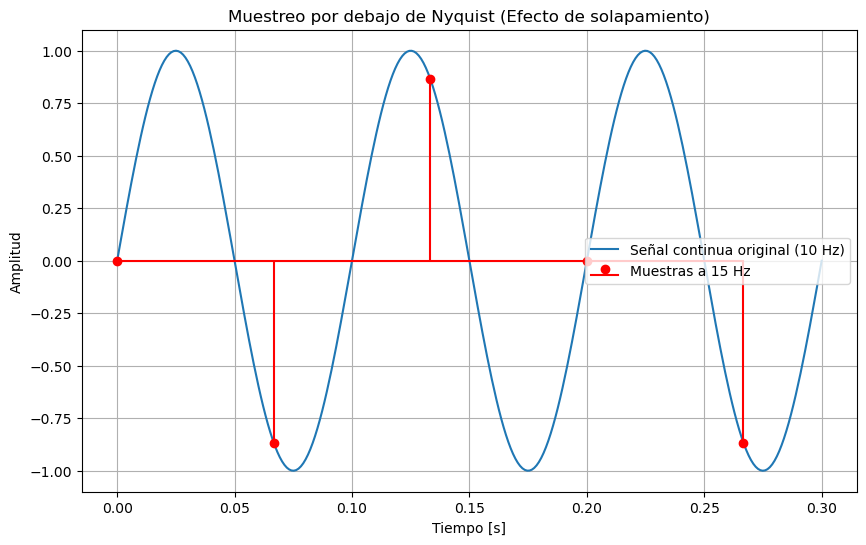

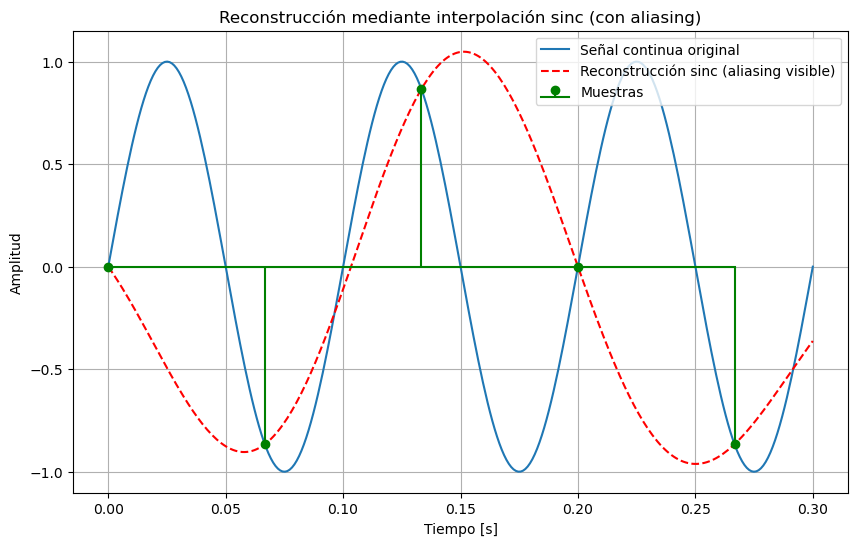

Error de reconstrucción sinc: 0.929623


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Ejemplo de solapamiento (aliasing) e interpolación sinc
# ============================================================

# --- Parámetros de la señal ---
f = 10               # Frecuencia de la señal (Hz)
num_periodos = 3     # Número de periodos que se mostrarán
F_cont = 1000        # Frecuencia de muestreo del "tiempo continuo"

# --- Tiempo continuo y señal original ---
T = 1 / f
t_cont = np.linspace(0, num_periodos * T, int(num_periodos * T * F_cont))
x_cont = np.sin(2 * np.pi * f * t_cont)

# --- Muestreo por debajo de Nyquist (aliasing) ---
Fas = 15           # Frecuencia de muestreo (inferior a 2*f)
Ts = 1 / Fas
t_s = np.arange(0, num_periodos * T, Ts)
x_s = np.sin(2 * np.pi * f * t_s)

# --- Interpolación sinc ---
def sinc_interpolacion(t, ts, xs):
    """
    Interpolación de una señal discreta mediante la función sinc.
    """
    x_reconstruido = np.zeros_like(t)
    for i in range(len(xs)):
        x_reconstruido += xs[i] * np.sinc((t - ts[i]) / (ts[1] - ts[0]))
    return x_reconstruido

x_sinc = sinc_interpolacion(t_cont, t_s, x_s)

# ============================================================
# Visualización del aliasing
# ============================================================

plt.figure(figsize=(10, 6))
plt.plot(t_cont, x_cont, label=f'Señal continua original ({f} Hz)')
plt.stem(t_s, x_s, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Muestras a {Fas} Hz', use_line_collection=True)
plt.title('Muestreo por debajo de Nyquist (Efecto de solapamiento)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# ============================================================
# Visualización de la reconstrucción (interpolación sinc)
# ============================================================

plt.figure(figsize=(10, 6))
plt.plot(t_cont, x_cont, label='Señal continua original')
plt.plot(t_cont, x_sinc, 'r--', label='Reconstrucción sinc (aliasing visible)')
plt.stem(t_s, x_s, linefmt='g-', markerfmt='go', basefmt='g-', label='Muestras', use_line_collection=True)
plt.title('Reconstrucción mediante interpolación sinc (con aliasing)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# ============================================================
# Error de reconstrucción
# ============================================================
err_sinc = np.mean((x_sinc - x_cont)**2)
print(f"Error de reconstrucción sinc: {err_sinc:.6f}")


### Explicación:
En este ejemplo, la señal de 10 Hz es muestreada a 15 Hz (por debajo de la frecuencia de Nyquist), lo que genera solapamiento. La señal muestreada parece tener una frecuencia más baja de lo que realmente tiene.

---

## Conclusión

En esta primera parte de la práctica, hemos explorado los conceptos fundamentales del muestreo, cuantización, reconstrucción y solapamiento. Mediante visualizaciones, pudimos ver cómo cada proceso afecta a la señal original y cómo el solapamiento puede causar errores significativos cuando no se respeta la frecuencia de Nyquist.

---